# Regression models

### Performing a linear regression on table 8 offenses

This notebook takes the table 8 offenses data to the world of predictions - we will be running feature changes and attempting a linear regression with the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Perform some of the same data cleaning from the last project - drop bad rows and columns
df = pd.read_excel('../../_Datasets/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', skiprows=4)
df = df[:-3]
df.columns = ['City', 'Population', 'Violent_crime', 'Murder_NON_manslaughter', 'Rape_revised', 'Rape_legacy', 'Robbery', 
        'Aggravated_assault', 'Property_crime', 'Burglary', 'Larceny-Theft', 'Motor_vehicle_theft', 'Arson']
df.drop(columns=['Rape_revised', 'Arson'], inplace=True)
df2 = df.copy()
# Checking to see if the notes were in fact removed
df.tail()

,City,Population,Violent_crime,Murder_NON_manslaughter,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny-Theft,Motor_vehicle_theft
343,Woodbury Town,10685.0,3.0,0.0,0.0,2.0,1.0,541.0,9.0,529.0,3.0
344,Woodridge Village,829.0,7.0,0.0,0.0,0.0,7.0,17.0,8.0,9.0,0.0
345,Woodstock Town,5931.0,2.0,0.0,0.0,0.0,2.0,58.0,13.0,45.0,0.0
346,Yonkers,199134.0,1036.0,6.0,25.0,390.0,615.0,2368.0,470.0,1662.0,236.0
347,Yorktown Town,36643.0,15.0,0.0,0.0,2.0,13.0,334.0,45.0,287.0,2.0


# Next steps

### Let's get an idea of how this data looks after basic cleansing.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 11 columns):
City                       348 non-null object
Population                 348 non-null float64
Violent_crime              348 non-null float64
Murder_NON_manslaughter    348 non-null float64
Rape_legacy                348 non-null float64
Robbery                    348 non-null float64
Aggravated_assault         348 non-null float64
Property_crime             348 non-null float64
Burglary                   348 non-null float64
Larceny-Theft              348 non-null float64
Motor_vehicle_theft        348 non-null float64
dtypes: float64(10), object(1)
memory usage: 30.0+ KB


In [4]:
df.describe()

,Population,Violent_crime,Murder_NON_manslaughter,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny-Theft,Motor_vehicle_theft
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000


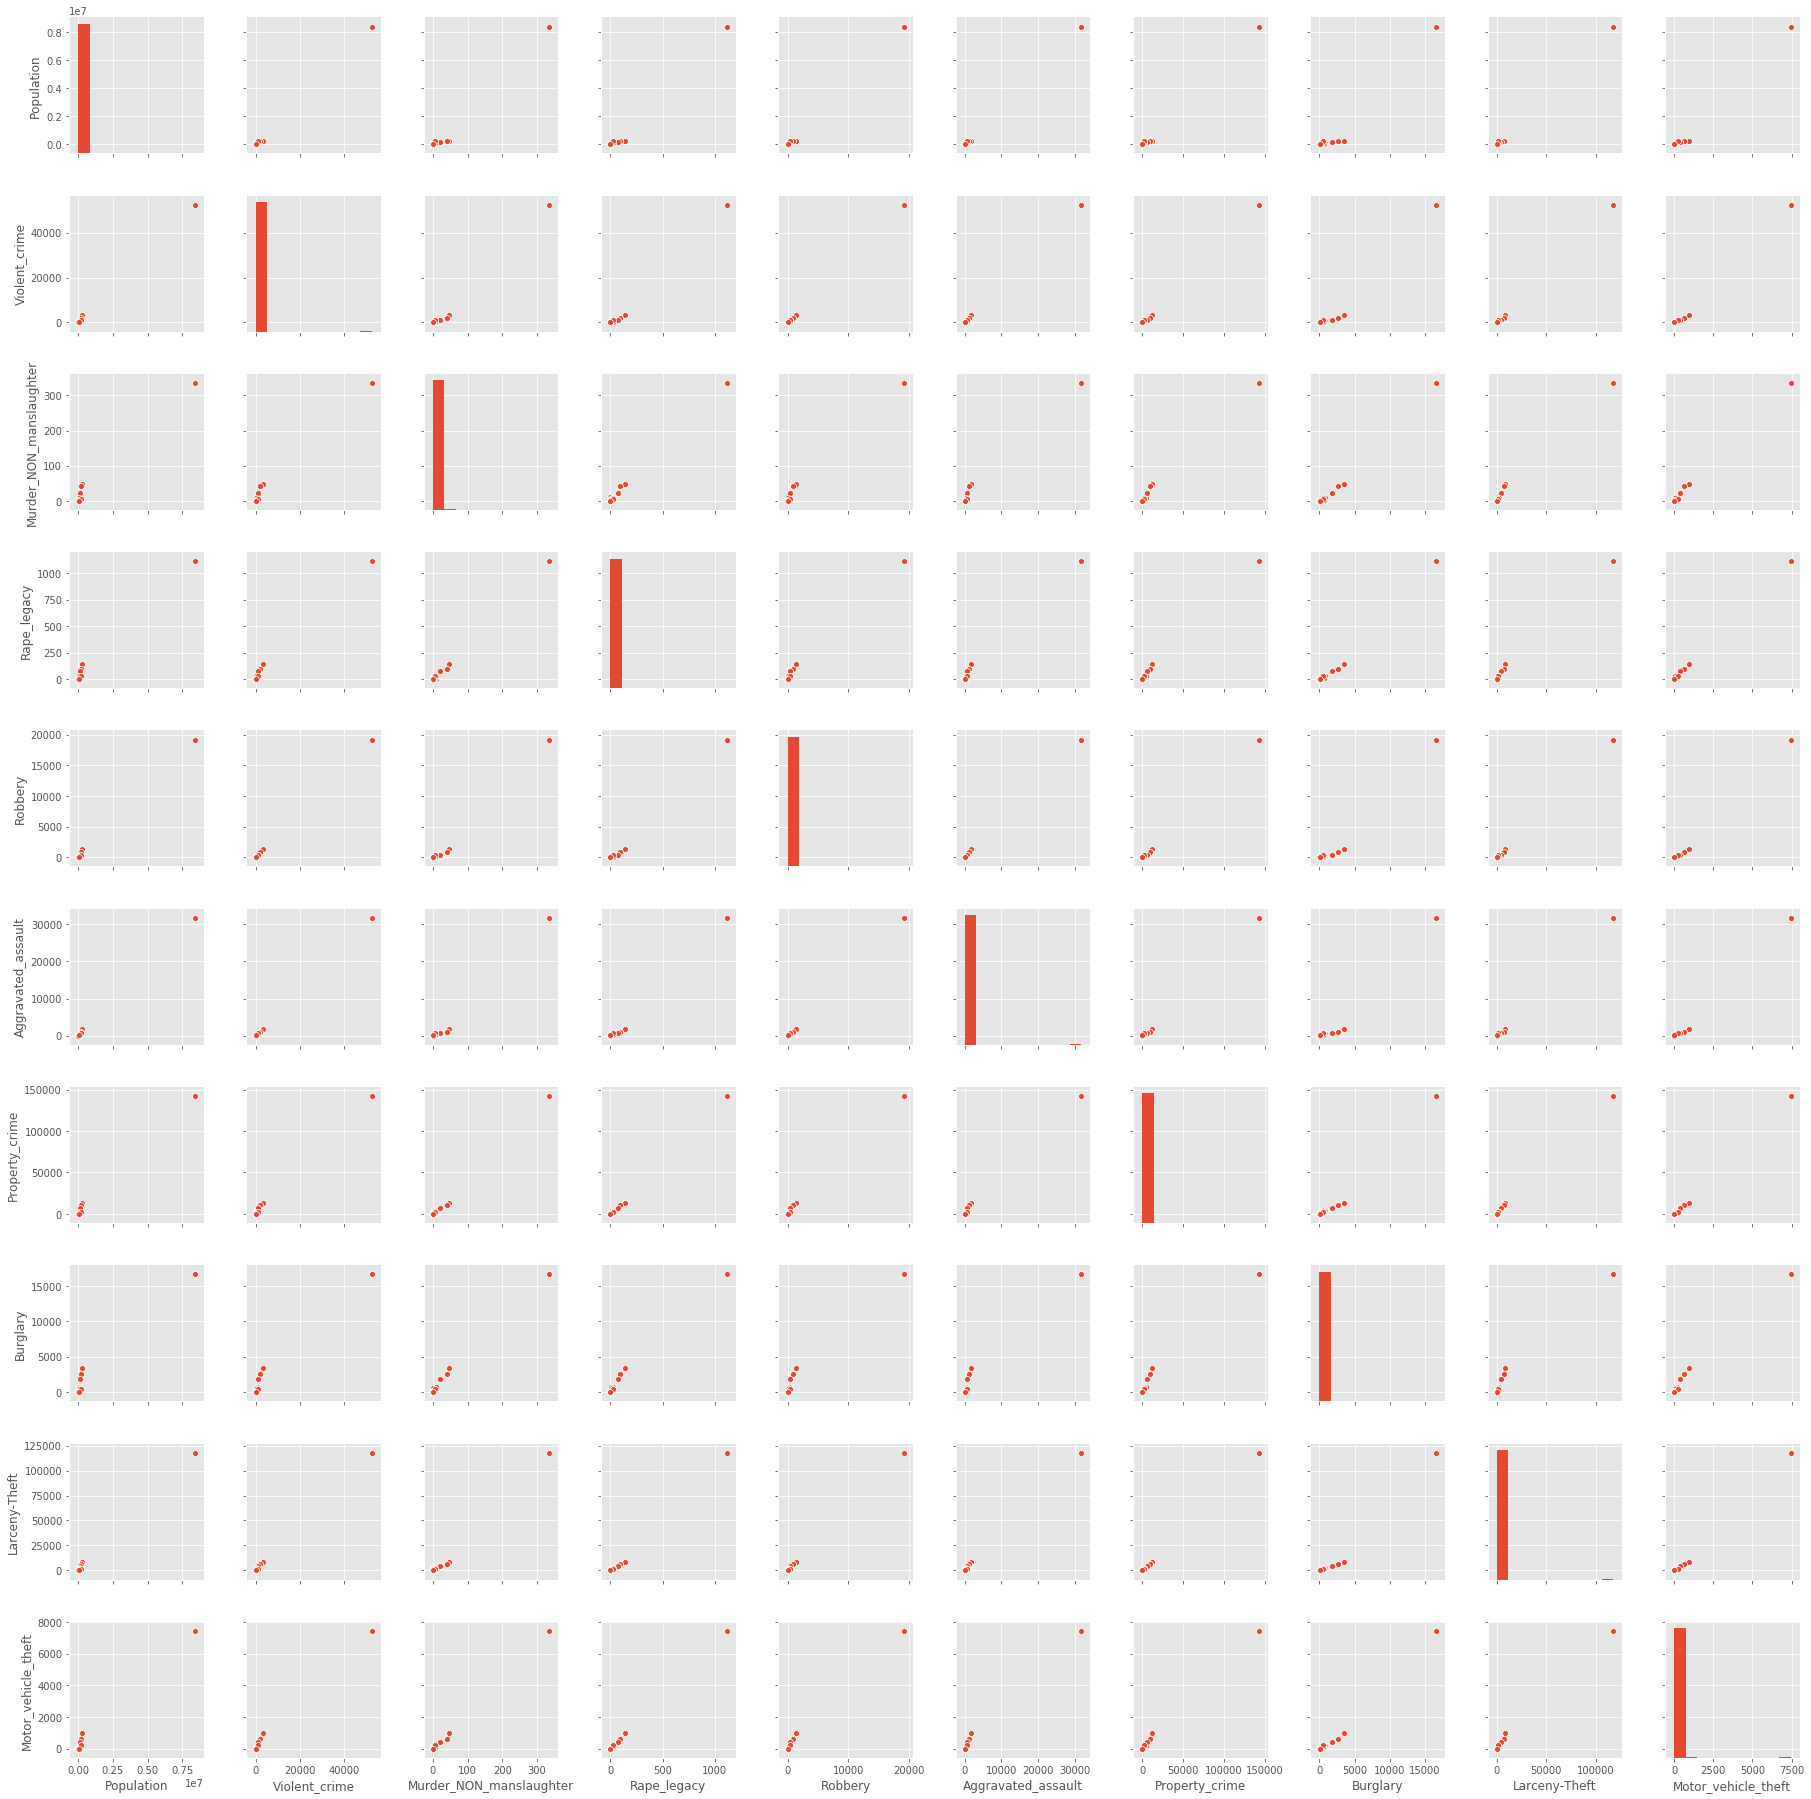

In [6]:
# Will pairplot tell us much?
sns.pairplot(df)

### Pairplot

It's hard to extract value or insight from this with the scale we are seeing.

### Heatmap

How is correlation here amongst the features?

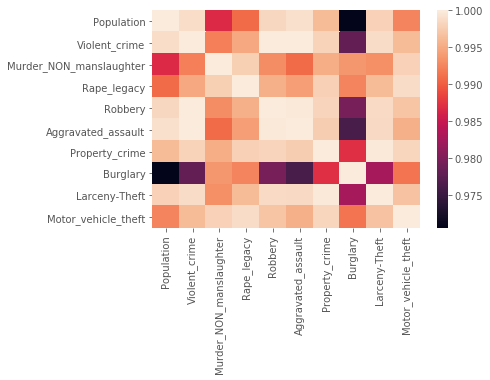

In [7]:
sns.heatmap(df.corr())

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


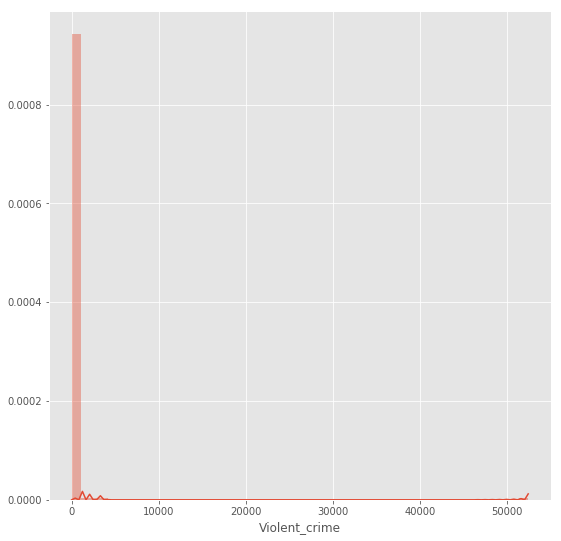

In [8]:
# Let's take a closer look at a distribution - violent crime
fig, ax = plt.subplots(figsize=(9, 9))
sns.distplot(df.Violent_crime, ax=ax)

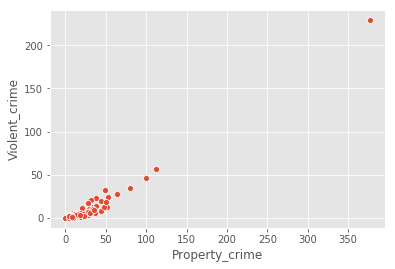

In [9]:
# Will np.sqrt feature transformation help much?
sns.scatterplot(np.sqrt(df.Property_crime), np.sqrt(df.Violent_crime))

### Massive outlier

This outlier is exerting its extreme values onto the other points. It does not appear to be crazy, as the linear relationship still seems respected - we will retain it.

### Identify the extreme point

Let's find the point, and just see how things behave without it.

In [10]:
df.loc[df.Violent_crime.idxmax()]

City                          New York
Population                 8.39613e+06
Violent_crime                    52384
Murder_NON_manslaughter            335
Rape_legacy                       1112
Robbery                          19170
Aggravated_assault               31767
Property_crime                  141971
Burglary                         16606
Larceny-Theft                   117931
Motor_vehicle_theft               7434
Name: 216, dtype: object

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


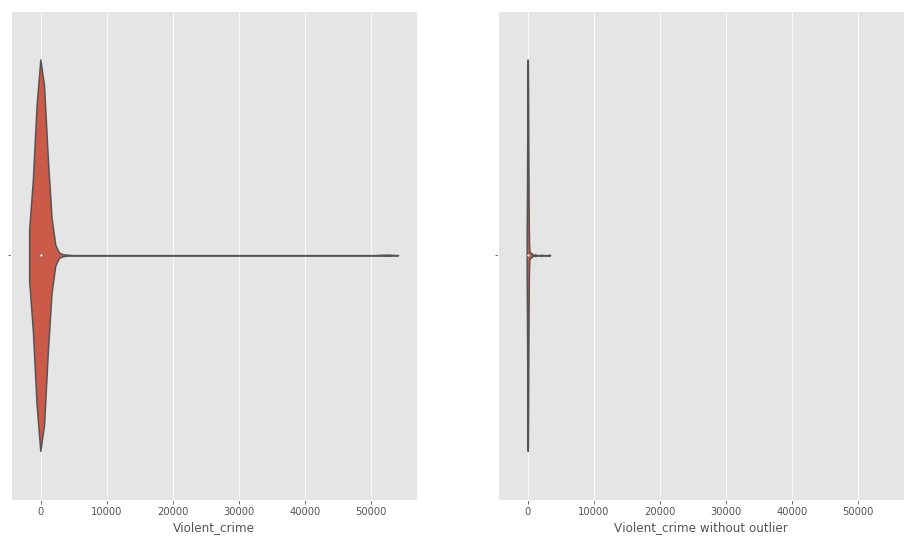

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharex=True)
# We are using violinplots because the boxplot is hard to observe in this context
sns.violinplot(df.Violent_crime, ax=ax1)
sns.violinplot(df.drop(216)['Violent_crime'], ax=ax2)
ax2.set_xlabel('Violent_crime without outlier')
plt.show()

### Side by side violinplots

We force the same scale on these plots to really capture the power of the outlier - it is pretty overwhelming.

### Outlier's impact 

Let's take a regression line plot with a confidence interval and see if the value affects others significantly. (Spoiler alert: it is probably so, after seeing the pairplot.)

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


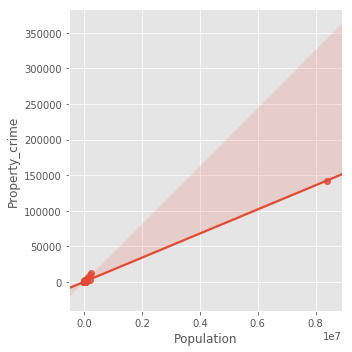

In [12]:
sns.lmplot('Population', 'Property_crime', data=df)

### Propert crime per population figure?

Surely treating property crime along the lines of per capita will yield more reasonable figures...

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


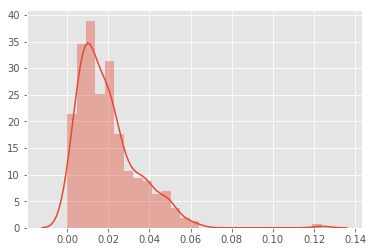

In [13]:
sns.distplot(df.Property_crime / df.Population)

### Notes: Lmplot

It appears the outlier (or outliers) are still affecting the data.

### Outlier or extreme value?

We can observe an extreme value - New York City - that in comparison is entirely different. I wouldn't consider it an outlier *solely* because it's so much larger. We can see that a regression line fits the set fairly well, including the extreme value. We can also see as crime proportions of populations, we end up with a left-skewed distribution. Perhaps there's nothing crazy happening here.

### Log transformation

If need be, a logarithmic transformation might be able to control it, as shown below.

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


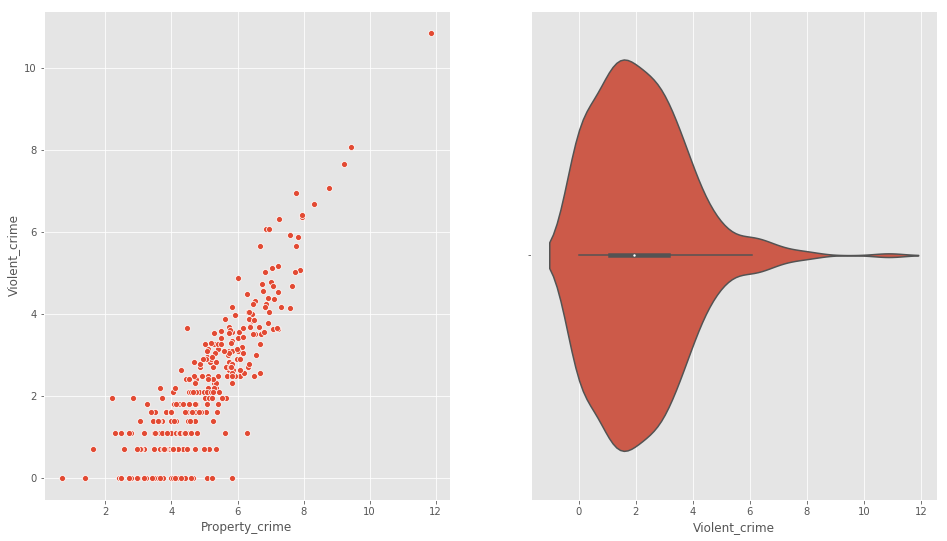

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
sns.scatterplot(np.log(df.Property_crime), np.log(df.Violent_crime), ax=ax1)
sns.violinplot(np.log(df.Violent_crime + 1), ax=ax2)

# REMOVE THIS IF ABOVE CELL RUNS

# REMOVE THIS IF ABOVE CELL RUNS

# REMOVE THIS IF ABOVE CELL RUNS

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


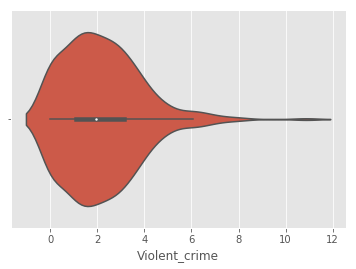

In [15]:
sns.violinplot(np.log(df.Violent_crime + 1))

# REMOVE THIS IF ABOVE CELL RUNS

# REMOVE THIS IF ABOVE CELL RUNS

# REMOVE THIS IF ABOVE CELL RUNS

# Modeling

### Train and test split and linear regression

In [16]:
X = df2.drop(columns=['City', 'Property_crime'])
y = df2.Property_crime
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

F:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
LR = LinearRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
LR.score(X_test, y_test)

1.0

In [18]:
LR.coef_

array([-1.38950754e-17, -4.05068931e-14, -1.97573633e-13,  7.55649851e-14,
        3.92483298e-14,  4.47249492e-14,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00])

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


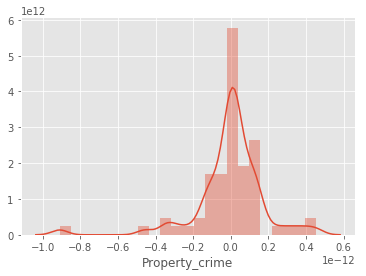

In [19]:
sns.distplot(y_test - pred)

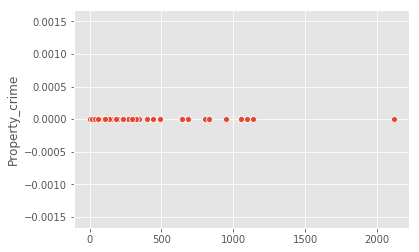

In [20]:
sns.scatterplot(pred, y_test - pred)

# Linear Regression assumptions

Two assumptions regarding our linear regression models hold true here in flying colors:

Normal distribution of residuals - We have a spike around the value '0' of residuals. There are some small spikes at very small values, seemingly quite close to zero as well (they are on the 10^-12 scale).

Homoscedasticity - When considering predictions against residuals, we want to have a distribution with balanced values; values that cancel out to nearly zero. We have values sitting on the value zero across this graph, showing the model treats values across the board almost equally.

#### Notes: Perfect score of one

It is disconcerting that the R^2 score is a perfect one. We should do some further holdouts to see if this holds up.

In [21]:
LR2 = LinearRegression()
cross = cross_val_score(LR2, X, y, cv=10)
cross

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Cross-validation

Cross-validation of the model holds up. We have ten folds that all return perfect scores. This doesn't seem right, but with a small data set, it might be possible.

In [22]:
cross_val_score(LR2, X, y, cv=200)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# More folds

When performing CV with more folds, we see some terrible scores. This is probably a symptom of overfitting.

Let's attempt the logarithmic transformation.

In [23]:
df3 = (df2.drop(columns='City') + 1).apply(np.log)
df3.head()

,Population,Violent_crime,Murder_NON_manslaughter,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny-Theft,Motor_vehicle_theft
0,7.529406,0.000000,0.000000,0.000000,0.000000,0.000000,2.564949,1.098612,2.397895,0.000000
1,7.854769,1.386294,0.000000,0.000000,0.000000,1.386294,3.218876,1.386294,3.044522,0.693147
2,7.954021,1.386294,0.000000,0.000000,0.000000,1.386294,2.833213,0.693147,2.772589,0.000000
3,11.492284,6.674561,2.197225,3.433987,5.429346,6.267201,8.316545,6.559615,8.084562,4.962845
4,8.762333,3.178054,0.000000,1.386294,1.609438,2.833213,5.411646,3.988984,5.111988,1.791759


In [24]:
X = df3.drop(columns='Property_crime')
y = df3.Property_crime
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
LR3 = LinearRegression()
LR3.fit(X_train, y_train).score(X_test, y_test)

0.9982311618662222

### Almost perfect

We are no longer seeing '1', but the score is still *very* high. Perhaps some cross validation folds can show us if it's problematic.

# Cross-validation on logarithmic transformations

### Ten folds

In [25]:
cross_val_score(LR3, X, y, cv=10)

array([0.99926114, 0.99899458, 0.99654704, 0.99747253, 0.99889966,
       0.9967741 , 0.99883141, 0.99724502, 0.99727529, 0.99771598])

### 100 folds

In [26]:
cross_val_score(LR3, X, y, cv=100)

array([0.99994886, 0.99995968, 0.99969379, 0.9980206 , 0.99957995,
       0.99973374, 0.99447404, 0.99876915, 0.99985059, 0.99881845,
       0.9993649 , 0.99591975, 0.99772003, 0.99875873, 0.99950862,
       0.99922044, 0.99835698, 0.99677417, 0.99421237, 0.99931145,
       0.99879111, 0.99717371, 0.99793532, 0.99813612, 0.99744147,
       0.9731194 , 0.97342071, 0.99834856, 0.99798527, 0.99866391,
       0.9938202 , 0.99832791, 0.99219126, 0.99874554, 0.99869917,
       0.99906444, 0.99394521, 0.99797109, 0.99956764, 0.99786809,
       0.99897012, 0.99874782, 0.99745922, 0.99907474, 0.99799388,
       0.99806226, 0.99552358, 0.99984645, 0.99665684, 0.99990091,
       0.99441491, 0.98614041, 0.99789742, 0.99614642, 0.99881012,
       0.99755661, 0.99995129, 0.99864477, 0.99685584, 0.99697583,
       0.97842729, 0.98539911, 0.94807197, 0.9999916 , 0.99944406,
       0.99978062, 0.98868809, 0.99736727, 0.99741466, 0.99481837,
       0.99473262, 0.99675923, 0.72981632, 0.99910403, 0.99687

### R Squared coefficients of determination

These numbers look surprisingly good. Too good?

# Intuition about extreme value

Considering extreme values as outliers seems to be the smarter approach. With the logarithmic transformation, we are no longer seeing only perfect or fail scores.

### Heatmaps of correlation

Will removing some of these correlations produce better results?

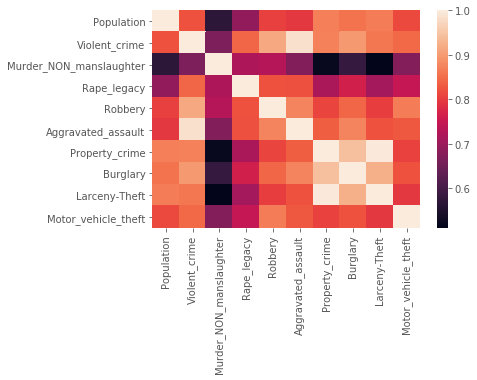

In [27]:
sns.heatmap(df3.corr())

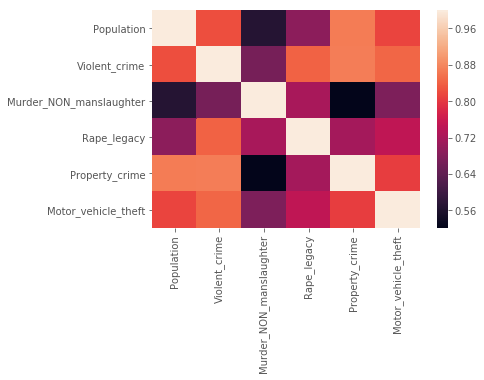

In [28]:
# df4 will be without the correlated features
df4 = df3.drop(columns=['Aggravated_assault', 'Larceny-Theft', 'Burglary', 'Robbery'])
sns.heatmap(df4.corr())

In [29]:
LR4 = LinearRegression()
X = df4.drop(columns='Property_crime')
y = df.Property_crime
cross_val_score(LR4, X, y, cv=50)

array([-1.14270952e+01, -7.71396056e+00, -6.38227570e+01, -1.37028509e+01,
       -8.47927060e+01, -2.37922175e+00, -2.05998029e+02, -3.11134209e+00,
       -9.46861344e+00, -3.99255324e+01, -2.68710963e+01, -4.29234728e+02,
       -6.97296049e+02, -3.06807152e+01, -5.22439740e+02, -3.71543281e+01,
       -4.76186642e+01, -2.65156144e+01, -7.68634826e+00, -1.77525614e+01,
       -3.74851949e+02, -1.83197115e+01, -3.45112258e+01, -8.34601283e+01,
       -5.35568616e+02, -4.32292118e+01, -4.20999025e+01, -5.26813506e+01,
       -4.29818740e+02, -8.56582594e+01, -2.55180262e-02, -6.13143422e+00,
       -1.56785265e+02, -6.73136508e+01, -8.55975789e+01, -2.63805827e+02,
       -2.99651557e+01, -1.99248428e+02, -6.37956346e+00, -3.57555229e+02,
       -3.86365348e+01, -9.31137908e+02, -8.97049363e+02, -9.03636871e+01,
       -1.10831045e+01, -2.92876853e+01, -3.98222853e+01, -3.84331776e+01,
       -3.19363652e+01, -4.17745646e+01])

# Dropping correlated features

When dropping some of the features that appeared to have high correlation, we received terrible results. The r^2 return of these high negative values indicates worse than simple mean-fitting.

Let's return to DF3 and LR3 with the features intact. 

In [30]:
X = df3.drop(columns='Property_crime')
y = df3.Property_crime

LR3.fit(X, y)
display(LR3.predict([X.loc[88]]))
display(y.loc[88])

array([4.87893088])

4.836281906951478

### Notes: One test

This row at 88 seems to be close to the mark, for example.

### Predicting a similar data point

Let's plug in an array similar to data point at row 60.

In [32]:
display(df3.loc[60])

display(LR3.predict([np.array([9, 3.6, 0, 1.1, 3.6, 4.4, 2.5, 4.1, 1.5])]))
display(y.loc[60])

Population                 8.917177
Violent_crime              3.688879
Murder_NON_manslaughter    0.000000
Rape_legacy                1.098612
Robbery                    0.000000
Aggravated_assault         3.637586
Property_crime             4.465908
Burglary                   2.639057
Larceny-Theft              4.248495
Motor_vehicle_theft        1.609438
Name: 60, dtype: float64

array([4.11686482])

4.465908118654584

### Notes: An almost entry

The value is a bit off (we are on a logarithmic scale). I think we changed the values too far from the original, as they were also on the logarithmic scale.

# Pairplot

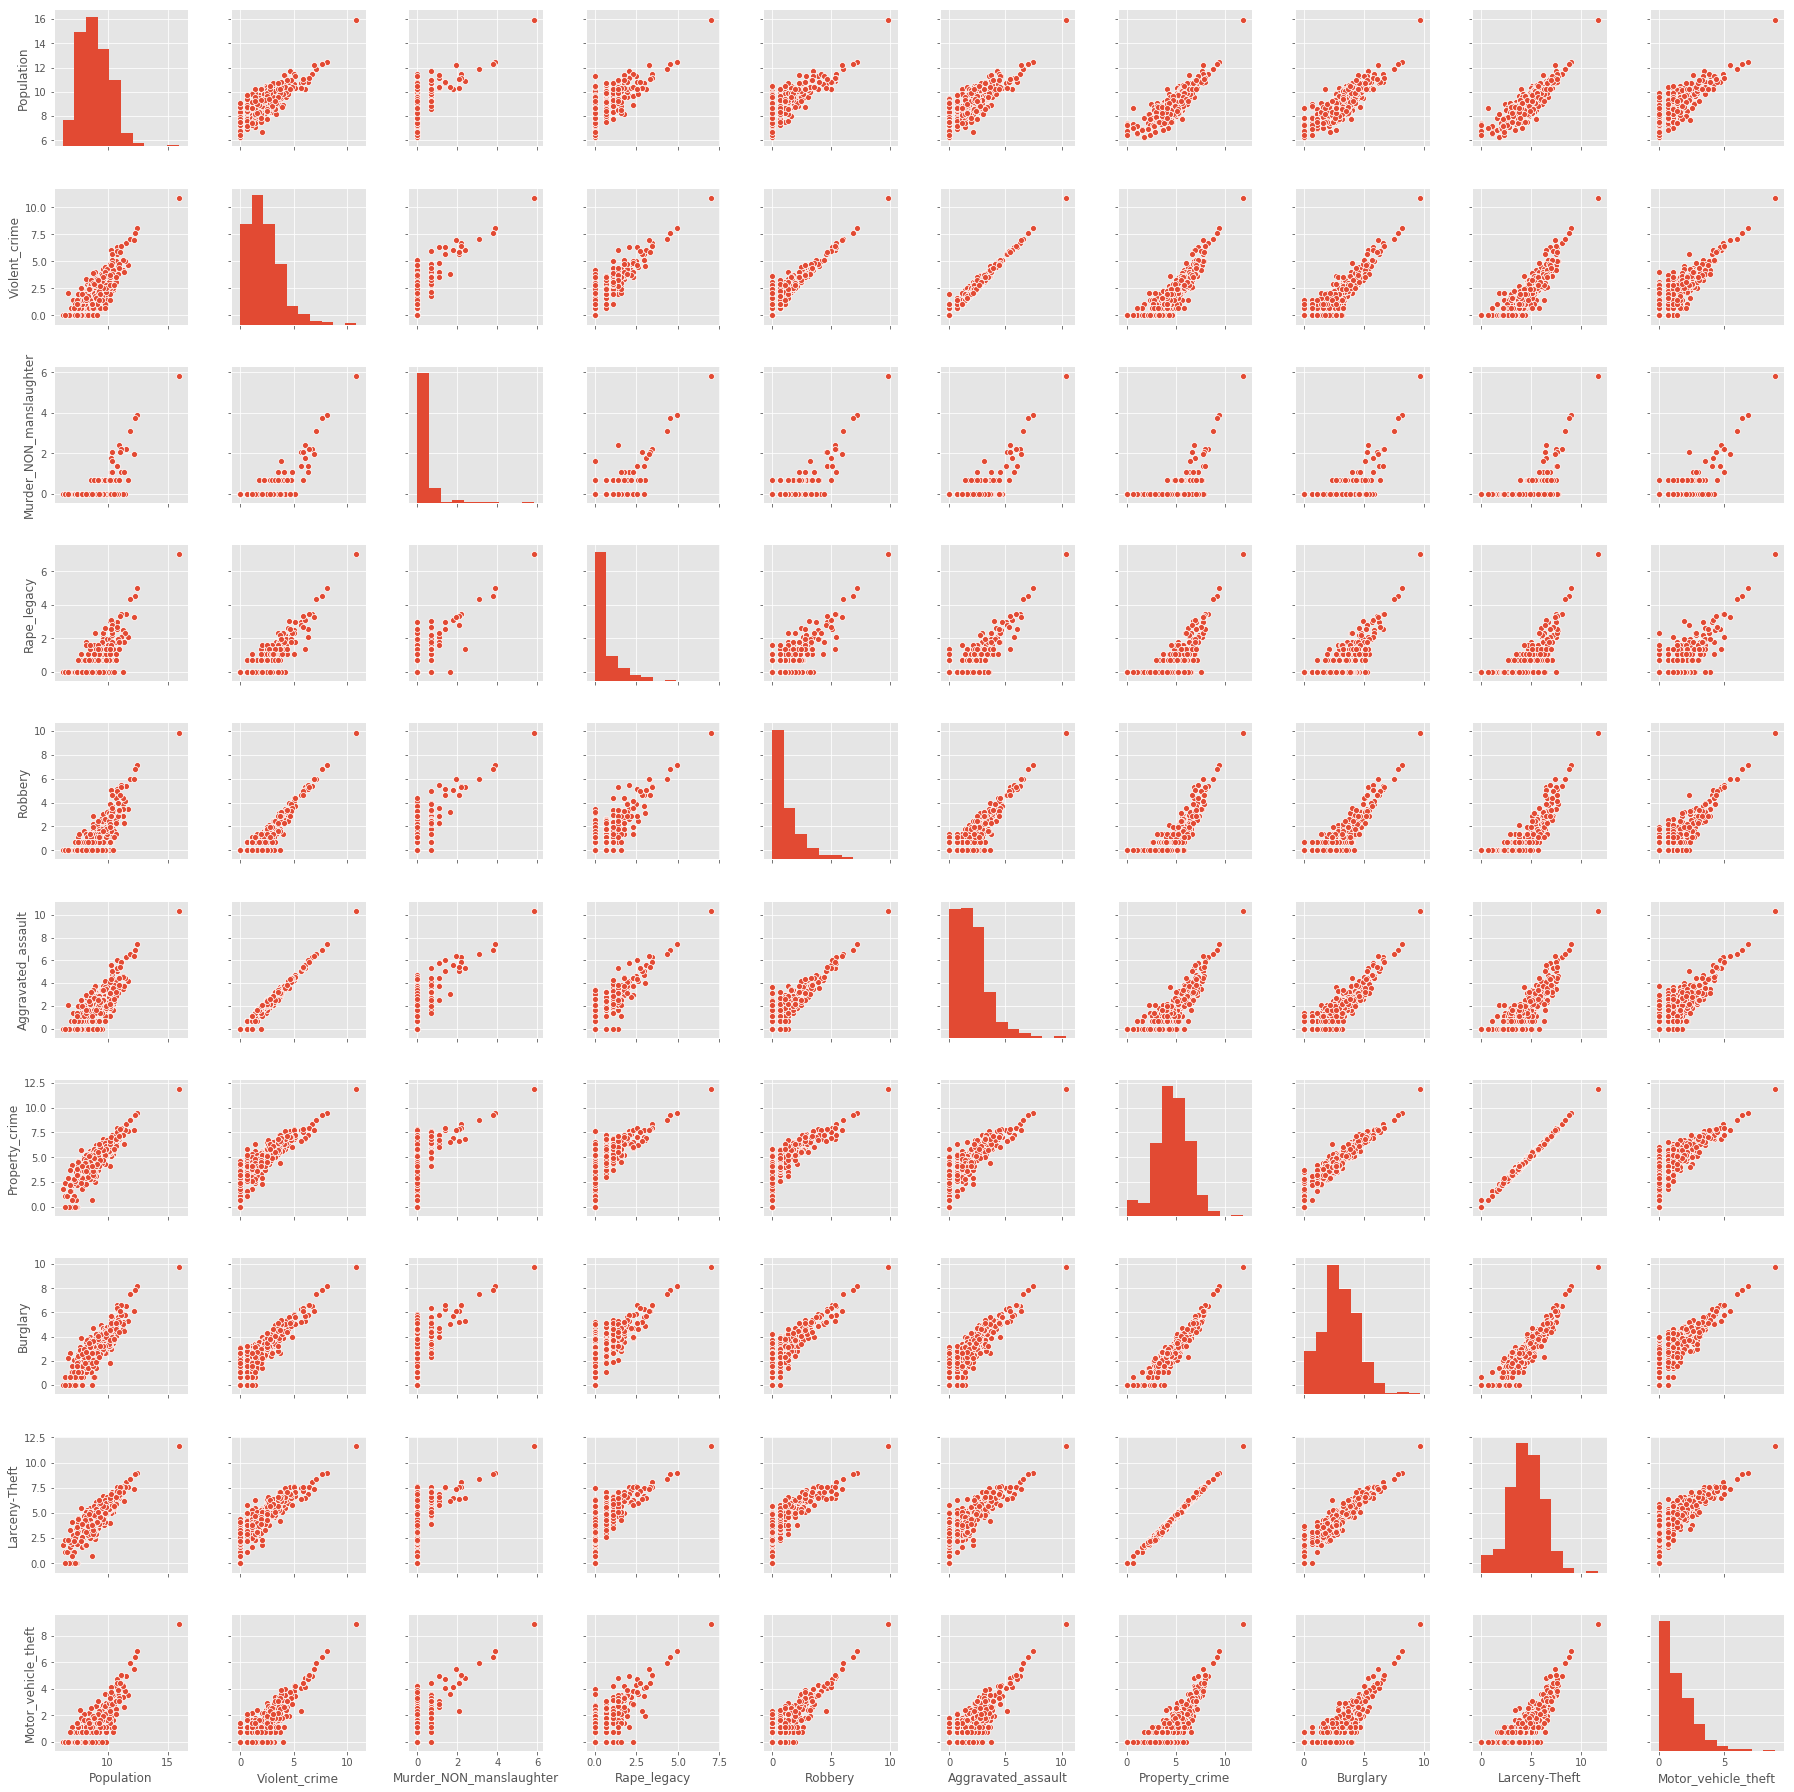

In [33]:
sns.pairplot(df3)

### The relationships look much more in line with what we want. (Pun intended)

# Residuals

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


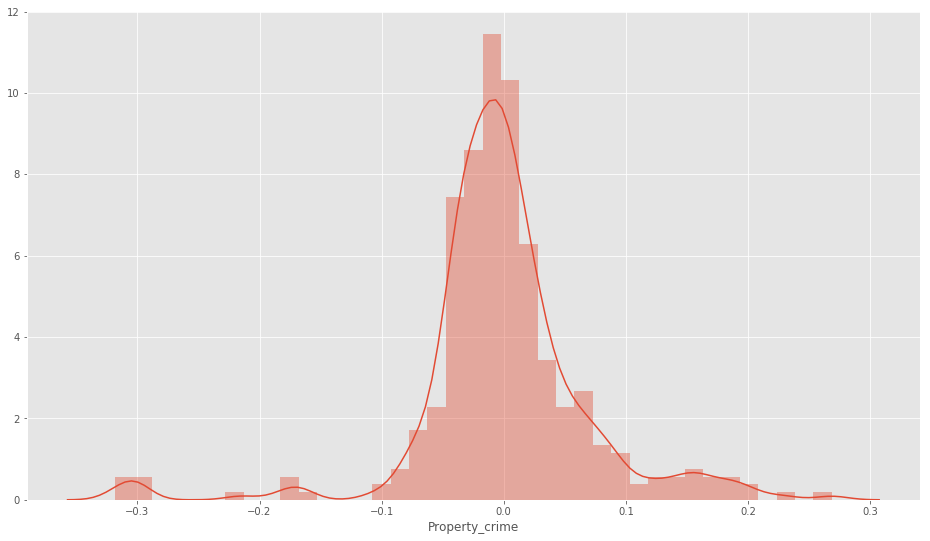

In [35]:
pred3 = LR3.predict(X)
fig, ax = plt.subplots(1, 1, figsize=(16,9))
sns.distplot(y - pred3, ax=ax)

### This complies with linear regression assumptions

# Homoscedasticity

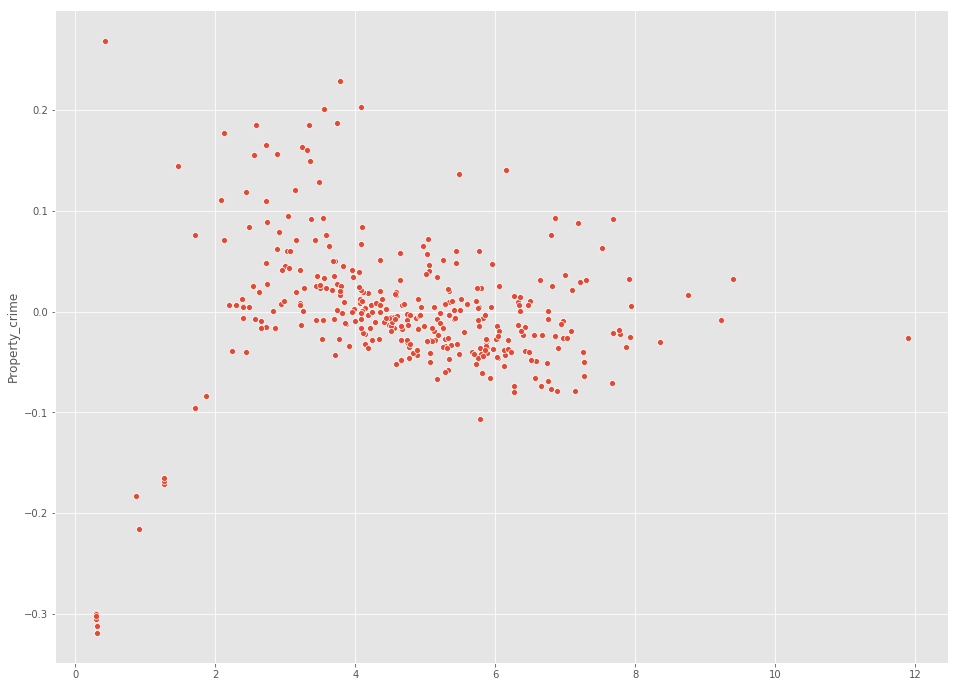

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.scatterplot(pred3, y - pred3, ax=ax)

### Not perfect, but it is better

This is more of a balanced and even distribution of the predictions against residuals. I think we made progress.

In [37]:
cross_val_score(LR3, X, y, cv=25)

array([0.99934779, 0.99919609, 0.99946692, 0.99797508, 0.99916196,
       0.99768342, 0.99822635, 0.99279267, 0.99749235, 0.99781269,
       0.99883746, 0.99876984, 0.99892982, 0.99714673, 0.99631032,
       0.99959177, 0.99603338, 0.99943971, 0.99645035, 0.997917  ,
       0.99651466, 0.99693577, 0.9981079 , 0.99920894, 0.99709886])

# More realistic results

We no longer have a humpy histogram of residuals, absolute perfect residuals versus predictions, nor unreasonable, non-linear correlations. Our r^2 values still seem *very* high, so this is not usable - BUT - it is closer to how real models should function.